In [1]:
import pandas as pd
import ramanspy as rp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_wheats = rp.datasets.wheat_lines(file="../wheats/Data.mat")

np.int64(0)

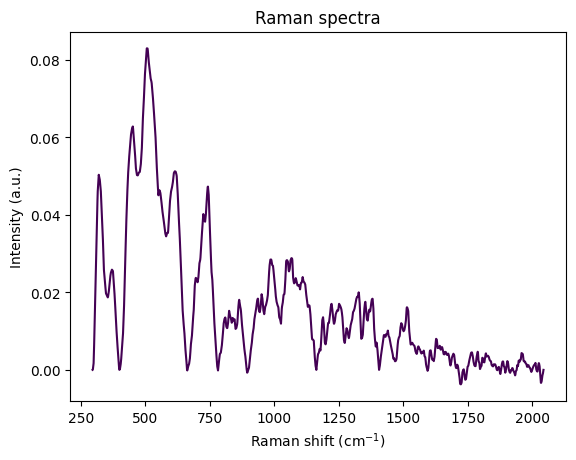

In [4]:
df_wheats[0][0].plot()
df_wheats[1][0]

In [6]:
spectra, labels, label_names = df_wheats

In [14]:
spectra.spectral_data.shape

(53134, 1748)